In [836]:
import imageio.v3 as iio
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.dpi'] = 100
PATCHSIZE = 5
borderXorigin = 100
borderYorigin = 100
borderXend = 150
borderYend = 300

In [837]:
def read(image_uri) : #Put URI of image #Out : Matrix of the image
    return iio.imread(image_uri)

def view(image) : #you can put a matrix or a URI and it plots the image/matix

    if isinstance(image, str) :
          image = read(image)

    plt.imshow(image , cmap = 'gray')
    plt.show()
    
def save(image,filename) : #convert Matrix to an image
    iio.imwrite(filename, image)
    

def maskeffect(image,mask,f) : #You can put a matrix or a URI #apply effect to a zone of the image
    """
    Apply f on all the pixels 1 of the mask on the image
    """
    
    if isinstance(image, str) :
        image = read(image)
    
    if not mask.shape[:2] == image.shape[:2]:
        return print("⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️The mask doesn't fit the image ⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️" )
    
    out = image.copy()
    
    for x in range(mask.shape[0]) :
        for y in range(mask.shape[1]) :
            if mask[x,y] == 0 :
                out[x,y] = f(x,y)
    return out

def generate_mask(image) : #Generate a mask of the size of the image
    
    if isinstance(image, str) :
        image = read(image)
    
    out = np.ones(image.shape)
    return out

def zone_mask(mask,startX = borderXorigin, startY = borderYorigin, endX = borderXend,endY = borderYend) : #Select the zone of the image to apply effects
    
    for x in range(startX,endX + 1):
        for y in range(startY,endY + 1):
            mask[x,y] = 0
    

Example of mask effect functions

In [838]:
def nullify(x,y):
    return 0

def invert(image):
    def inversion(x,y): 
        return 255- image[x,y]
    return inversion

def copy(image,startX,startY,offsetX,offsetY):
    def copy(x,y):
        return image[startX + (x-offsetX), startY + (y-offsetY)]
    return copy


[[127. 127. 127. ... 256. 256. 256.]
 [127. 127. 127. ... 256. 256. 256.]
 [127. 127. 127. ... 256. 256. 256.]
 ...
 [127. 127. 127. ... 256. 256. 256.]
 [127. 127. 127. ... 256. 256. 256.]
 [127. 127. 127. ... 256. 256. 256.]]


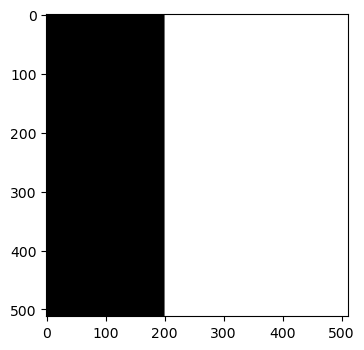

In [839]:

lena = read("lena.tif")
lena = generate_mask(lena) +128
zone_mask(lena,0,0,lena.shape[0]-1,200)

lena = lena+127

print(lena)
view(lena)

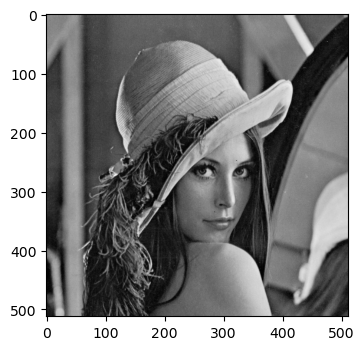

In [840]:
view("lena.tif")

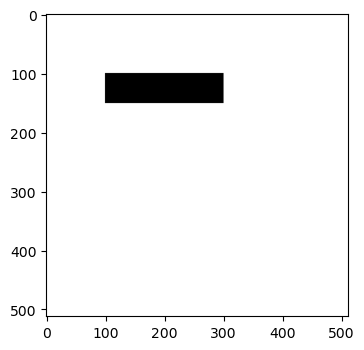

In [841]:
mask = generate_mask(lena)

zone_mask(mask,borderXorigin,borderYorigin,borderXend,borderYend)

save(mask,"mask.tif")

view(mask)

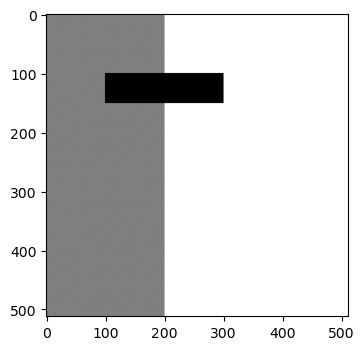

In [842]:
lena_effect = maskeffect(lena,mask,nullify)
view(lena_effect)

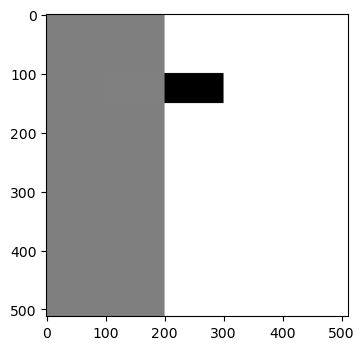

In [843]:
lena_invert = maskeffect(lena, mask, invert(lena))
view(lena_invert)

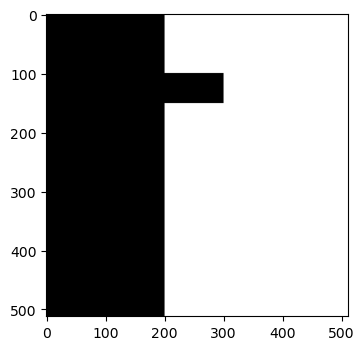

In [844]:
lena_copy = maskeffect(lena,mask, copy(lena,0,0,100,100))
view(lena_copy)

In [845]:
def get_patch(image,position,patch_size= PATCHSIZE):
    r= patch_size // 2 
    clip = image[position[0]-r:position[0]+r+1, position[1]-r:position[1]+r+1]
    return clip    

def c_matrix(mask):
    n,m= mask.shape
    c=np.zeros(mask.shape,dtype=np.float128)
    for k in range(n):
        for l in range(m):
            patch = get_patch(mask,(k,l))
            c[k,l]=np.sum(patch)/(patch.shape[0]*patch.shape[1])
    return c

/tmp/ipykernel_14542/1091943012.py:12: RuntimeWarning: invalid value encountered in double_scalars
  c[k,l]=np.sum(patch)/(patch.shape[0]*patch.shape[1])
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Casting input data from float128 to float64 for imshow
  fig.canvas.print_figure(bytes_io, **kw)


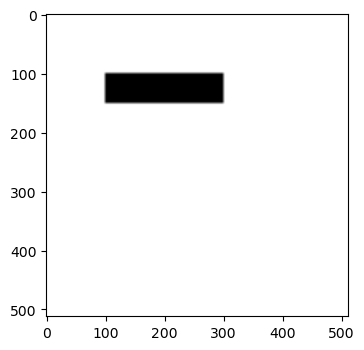

0.5999999999999999778


In [846]:
view(c_matrix(mask))
print(c_matrix(mask)[border[8]])


In [847]:
def init_border(startX = borderXorigin, startY = borderYorigin, endX = borderXend,endY = borderYend):
    border = []
    for y in range(startY-1,endY + 2):
        border.append((startX-1,y))
        border.append((endX+1,y))

    for x in range(startX ,endX+1):
        border.append((x,startY-1))
        border.append((x,endY+1))
    
    return border

def update_border(mask,border,position,patch_size = PATCHSIZE) :
    r = patch_size // 2
    x,y = position
    for i in range(-r,r+1) :
        if mask[x-r-1,y+i] == 0 : border.append((x-r-1,y+i)) #UP
        if mask[x+r+1,y+i] == 0 : border.append((x+r+1,y+i)) #DOWN
        if mask[x+i,y-r-1] == 0 : border.append((x+i,y-r-1)) #LEFT
        if mask[x+i,y+r+1] == 0 : border.append((x+i,y+r+1)) #RIGHT

    for i in range(-r,r+1) :
        for j in range(-r,r+1):
            try :
                border.remove((x+i,y+j))
            except : 
                pass

def draw_border(mask,border):
    border_mask = np.zeros(mask.shape)
    for (x,y) in border :
        border_mask[x,y] = 1

    return border_mask



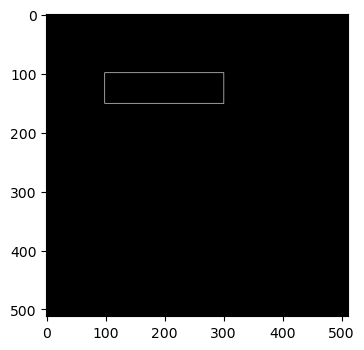

In [848]:
mask = generate_mask(lena)

zone_mask(mask)

border = init_border()

view(draw_border(mask,border))



In [849]:
position = (100, 150)

x,y = position

update_border(mask,border,position,patch_size = PATCHSIZE)

r = PATCHSIZE//2
for i in range(-r,r+1) :
    for j in range(-r,r+1):
        mask[x+i,y+j]= 1





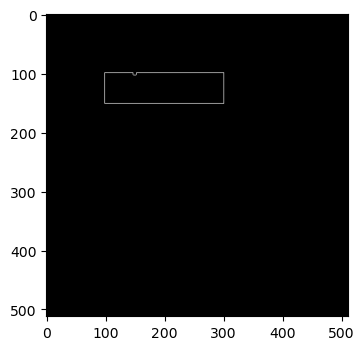

In [850]:
view(draw_border(mask,border))
save(draw_border(mask,border),"border.tif")

In [851]:
def sobelGradX(ima):

    nl,nc=ima.shape
    gradx=np.zeros((nl,nc))

    for i in range(1,nl-1):
        for j in range(1,nc-1):
            gradx[i,j]=ima[i-1,j+1]+2*ima[i,j+1]+ima[i+1,j+1]-ima[i-1,j-1]-2*ima[i,j-1]-ima[i+1,j-1];
            
    return gradx
              
def sobelGradY(ima):

    nl,nc=ima.shape
    grady=np.zeros((nl,nc))

    for i in range(1,nl-1):
        for j in range(1,nc-1):
            grady[i,j]=ima[i+1,j-1]+2*ima[i+1,j]+ima[i+1,j+1]-ima[i-1,j-1]-2*ima[i-1,j]-ima[i-1,j+1];
        
    return grady

def maskify_image(image,mask) : 
    masked_image = np.copy(image)
    for x in range(mask.shape[0]) :
        for y in range(mask.shape[1]) :
            if mask[x,y] == 0 : masked_image[x,y] = 0
    return masked_image


In [852]:
def get_grad_color(patch) : # DeltaI de p
    
    gradX = sobelGradX(patch)
    gradY = sobelGradY(patch)

    centerX, centerY = patch.shape[0]//2 ,patch.shape[1]//2
    
    x,y = centerX, centerY 

    if patch[centerX + 1, centerY] == 0 : x = centerX -1
    if patch[centerX - 1, centerY] == 0 : x = centerX +1

    if patch[centerX, centerY + 1] == 0 : y = centerY -1
    if patch[centerX, centerY-1] == 0 : y = centerY +1

    return gradX[x,y],gradY[x,y]
    


In [853]:
def get_grad_border(mask,position) : #n(p)
    
    patch = get_patch(mask,position)
    
    gradX = sobelGradX(patch)
    gradY = sobelGradY(patch)

    centerX, centerY = patch.shape[0]//2 ,patch.shape[1]//2

    return gradY[centerX, centerY],gradX[centerX, centerY]

In [854]:
n=8
(x,y) = 200 ,200
print(border[n])
masked = maskify_image(lena,mask)
print(get_patch(masked,(x,y)))
print(get_patch(mask,(x,y)))

print(get_grad_color(get_patch(masked,(x,y))))
print(get_grad_border(mask,(x,y)))

(99, 103)
[[127. 127. 127. 256. 256.]
 [127. 127. 127. 256. 256.]
 [127. 127. 127. 256. 256.]
 [127. 127. 127. 256. 256.]
 [127. 127. 127. 256. 256.]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
(516.0, 0.0)
(0.0, 0.0)


In [855]:
def diff_patch(patch1,patch2):
    matrix = patch1 -patch2
    return np.sum(matrix**2)

def checkMask(mask,position) : 
    return mask[position] == 1


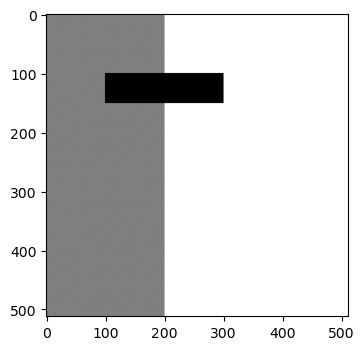

/tmp/ipykernel_14542/1091943012.py:12: RuntimeWarning: invalid value encountered in double_scalars
  c[k,l]=np.sum(patch)/(patch.shape[0]*patch.shape[1])


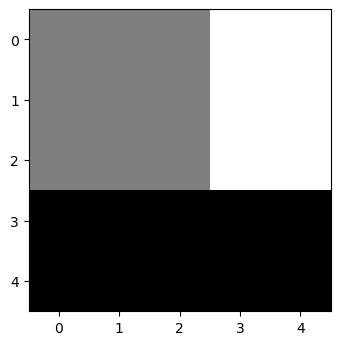

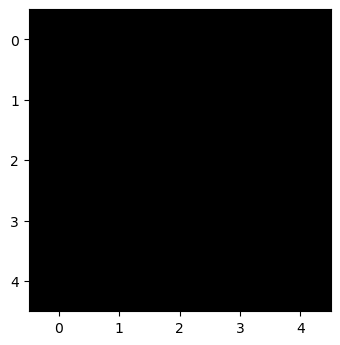

127.0


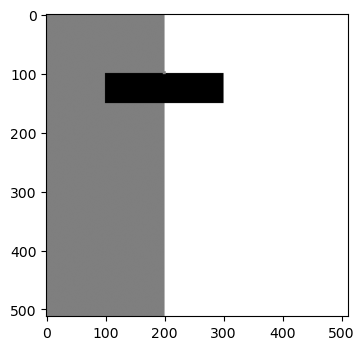

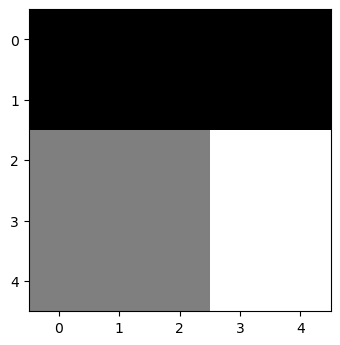

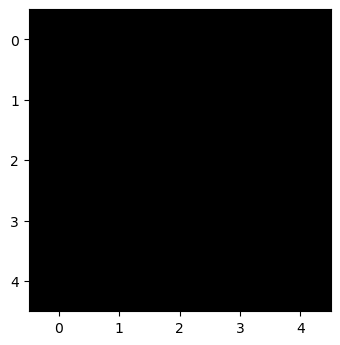

127.0


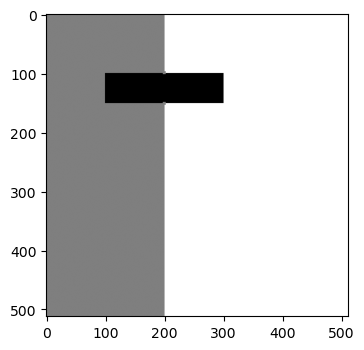

KeyboardInterrupt: 

In [859]:
image = lena

mask = generate_mask(image)
zone_mask(mask)
border = init_border()

masked = maskify_image(lena,mask)

view(masked)

r= PATCHSIZE//2

while len(border) != 0 :
    x,y = border[0]
    C = c_matrix(mask)
    P = abs(C[x,y])*abs(np.sum(np.multiply(get_grad_border(mask,(x,y)),get_grad_color(get_patch(masked,(x,y))))))
    
    chosenX,chosenY = x,y
    for x,y in border :
        tempP = abs(C[x,y])*abs(np.sum(np.multiply(get_grad_border(mask,(x,y)),get_grad_color(get_patch(masked,(x,y))))))
        if tempP > P :
            P = tempP
            chosenX,chosenY = x,y

    refPatch = get_patch(masked,(chosenX,chosenY))
    view(refPatch)
    replacementPatch = get_patch(masked,(r,r))
    d = diff_patch(replacementPatch,refPatch)
    
    for x in range (r, masked.shape[0]-r):
            for y in range (r,masked.shape[1]-r) :
                testPatch = get_patch(masked,(x,y))
                potential = True
                for i in range(x-r,x+r+1):
                    for j in range(y-r,y+r+1):
                        if checkMask(mask,(i,j)) == 0  : potential = False

                if potential :
                    dtest = diff_patch(testPatch,refPatch)
                    if dtest < d :
                        d = dtest
                        replacementPatch = testPatch

    view(replacementPatch)
    print( replacementPatch[r,r])

    
    update_border(mask,border,(chosenX,chosenY),patch_size = PATCHSIZE)

    for i in range(-r,r+1) :
        for j in range(-r,r+1):
            mask[chosenX+i,chosenY+j]= 1
            masked[chosenX+i,chosenY+j]= replacementPatch[r+i,r+j]

    view(masked)


    

    
                
    
    




   